### Start from here


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
tf.keras.backend.set_floatx('float32')

In [33]:

# Load the data
data = pd.read_csv("C:\\Users\\Mohammad\\Desktop\\Uni\\Uni work\\Year 4\\Term 7, fall 2022\\CMPE 460 Deep Learning\project\\CMPE-460-Project\\dataset\\car_price_prediction.csv")


# drop rows where the price is less than 100
data = data[data['Price'] >= 100]
data = data[~data['Model'].isin(["GONOW","IVECO DAYLY"])]



# Drop the totalPrice column
data = data.drop('totalPrice', axis=1)
data = data.drop('Wheel', axis=1)
data = data.drop('no-tax', axis=1)
data = data.drop('Engine volume', axis=1)

data = data.drop("ID", axis=1)

data['Doors'] = data['Doors'].replace({'-May':'','-Mar':''}, regex=True)
data['Doors'] = data['Doors'].str.replace('>5','5')

# Drop rows with missing or empty values in the "Doors" column
data = data[data['Doors'].str.strip() !='']
data['Doors'] = data['Doors'].astype(int)

data['Doors'] = data['Doors'].astype(int)

# Gear box editing
data['Gear box type'] = data['Gear box type'].replace({'Automatic': 1, 'Tiptronic': 2,'Variator':3, 'Manual':4})
data = data[data['Gear box type'].isin([1,2,3,4])]

data["Gear box type"] = data["Gear box type"].astype(int)

# 'Automatic' is changed to 1
# 'Tiptronic' is changed to 2
# 'Variator' is changed to 3
# 'Manual' is changed to 4


# Replace values in the "Leather interior" column based on conditions
data["Leather interior"] = data["Leather interior"].replace({"Yes": 1, "No": 0}) # Yes is 1; No is 0
# keep the rows where the value of "Leather interior" is 0 or 1
data = data[data["Leather interior"].apply(lambda x: x in [0, 1])]


# fuel type edit
data["Fuel type"] = data["Fuel type"].replace({"Hybrid":1, "Petrol":2,"Diesel":3,"CNG":4,"Plug-in Hybrid":5,"LPG":6,"Hydrogen":7})
allowed_fuel_types = [1, 2, 3, 4, 5, 6, 7]
data = data[data["Fuel type"].apply(lambda x: x in allowed_fuel_types)]

# 'Hybrid' is changed to 1,
# 'Petrol' is changed to 2, 
# 'Diesel' is changed to 3, 
# 'CNG' is changed to 4, 
# 'Plug-in Hybrid' is changed to 5, 
# 'LPG' is changed to 6,
# 'Hydrogen' is changed to 7


In [34]:
# Mapping

data["Manufacturer"] = data["Manufacturer"].replace({"LEXUS":1, "CHEVROLET":2,"GREATWALL":3,"HONDA":4,"FORD":5,"HYUNDAI":6,"TOYOTA":7,
                                                     "MERCEDES-BENZ":8, "OPEL":9,"PORSCHE":10,"BMW":11,"JEEP":12,"VOLKSWAGEN":13,"AUDI":14,
                                                     "RENAULT":15, "NISSAN":16,"SUBARU":17,"DAEWOO":18,"KIA":19,"MITSUBISHI":20,"SSANGYONG":21,
                                                     "MAZDA":22, "GMC":23,"FIAT":24,"INFINITI":25,"ALFA ROMEO":26,"SUZUKI":27,"ACURA":28,
                                                     "LINCOLN":29, "VAZ":30,"GAZ":31,"CITROEN":32,"LAND ROVER":33,"MINI":34,"DODGE":35,
                                                     "CHRYSLER":36, "JAGUAR":37,"ISUZU":38,"SKODA":39,"DAIHATSU":40,"BUICK":41,"TESLA":42,
                                                     "CADILLAC":43, "PEUGEOT":44,"BENTLEY":45,"VOLVO":46,"HAVAL":47,"HUMMER":48,"SCION":49,
                                                     "UAZ":50, "MERCURY":51,"ZAZ":52,"ROVER":53,"SEAT":54,"LANCIA":55,"MOSKVICH":56,
                                                     "MASERATI":57, "FERRARI":58,"SAAB":59,"LAMBORGHINI":60,"PONTIAC":61,"SATURN":62,"ASTON MARTIN":63})


In [35]:
# Remove "KM"
data["Mileage"] = data["Mileage"].str.replace("km","")
data["Mileage"] = data["Mileage"].astype(float)

In [36]:
data["Category"] = data["Category"].replace({"Jeep":1, "Hatchback":2,"Sedan":3,"Microbus":4,"Goods wagon":5,"Universal":6,"Coupe":7,
                                             "Minivan":8, "Cabriolet":9,"Limousine":10,"Pickup":11})

In [37]:
# data["Color"] = data["Color"].replace({"Silver":1, "Black":2,"White":3,"Grey":4,"Blue":5,"Green":6,"Red":7,
#                                                      "Sky blue":8, "Orange":9,"Yellow":10,"Golden":11,"Beige":12,"Brown":13,"Carnelian red":14,
#                                                      "Purple":15, "Pink":16})

# data = pd.get_dummies(data, columns=["Color"])


data = data.drop('Color', axis=1)

In [38]:
data["Drive wheels"] = data["Drive wheels"].replace({"4x4":1, "Front":2,"Rear":3})

In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder on the "Model" feature
encoder.fit(data["Model"])

# Transform the "Model" feature to numeric
data["Model"] = encoder.transform(data["Model"])


# Initialize the encoder
encoder1 = LabelEncoder()

# Fit the encoder on the "Model" feature
encoder1.fit(data["Manufacturer"])

# Transform the "Model" feature to numeric
data["Manufacturer"] = encoder1.transform(data["Manufacturer"])


In [40]:
# Cat_types = data["Manufacturer"].unique()
# p = 0
# for c in Cat_types:
#     p += 1  
#     print(p,c)

In [41]:
# # Assign each value of the "Model" column with the integer value of the corresponding "Manufacturer"
# data["Model_enc"] = data["Manufacturer"]


In [42]:
data.head(1100)

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Airbags,Price
0,0,1228,2010,1,1,1,186005.0,6,1,1,4,12,14727
1,1,651,2011,1,0,2,192000.0,6,2,1,4,8,17639
2,3,677,2006,2,0,2,200000.0,4,3,2,4,2,8467
3,4,654,2011,1,1,1,168966.0,4,1,1,4,0,4469
4,3,677,2014,2,1,2,91901.0,4,1,2,4,4,12172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,11,491,2009,1,1,2,163866.0,4,1,2,4,4,16834
1139,6,431,2017,3,1,2,20877.0,4,1,2,4,12,1719
1140,4,735,2013,3,1,2,137000.0,4,2,2,4,12,21652
1142,16,1542,2013,1,1,1,800.0,6,1,1,4,6,23521


In [43]:
data.columns


Index(['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels',
       'Doors', 'Airbags', 'Price'],
      dtype='object')

<AxesSubplot: >

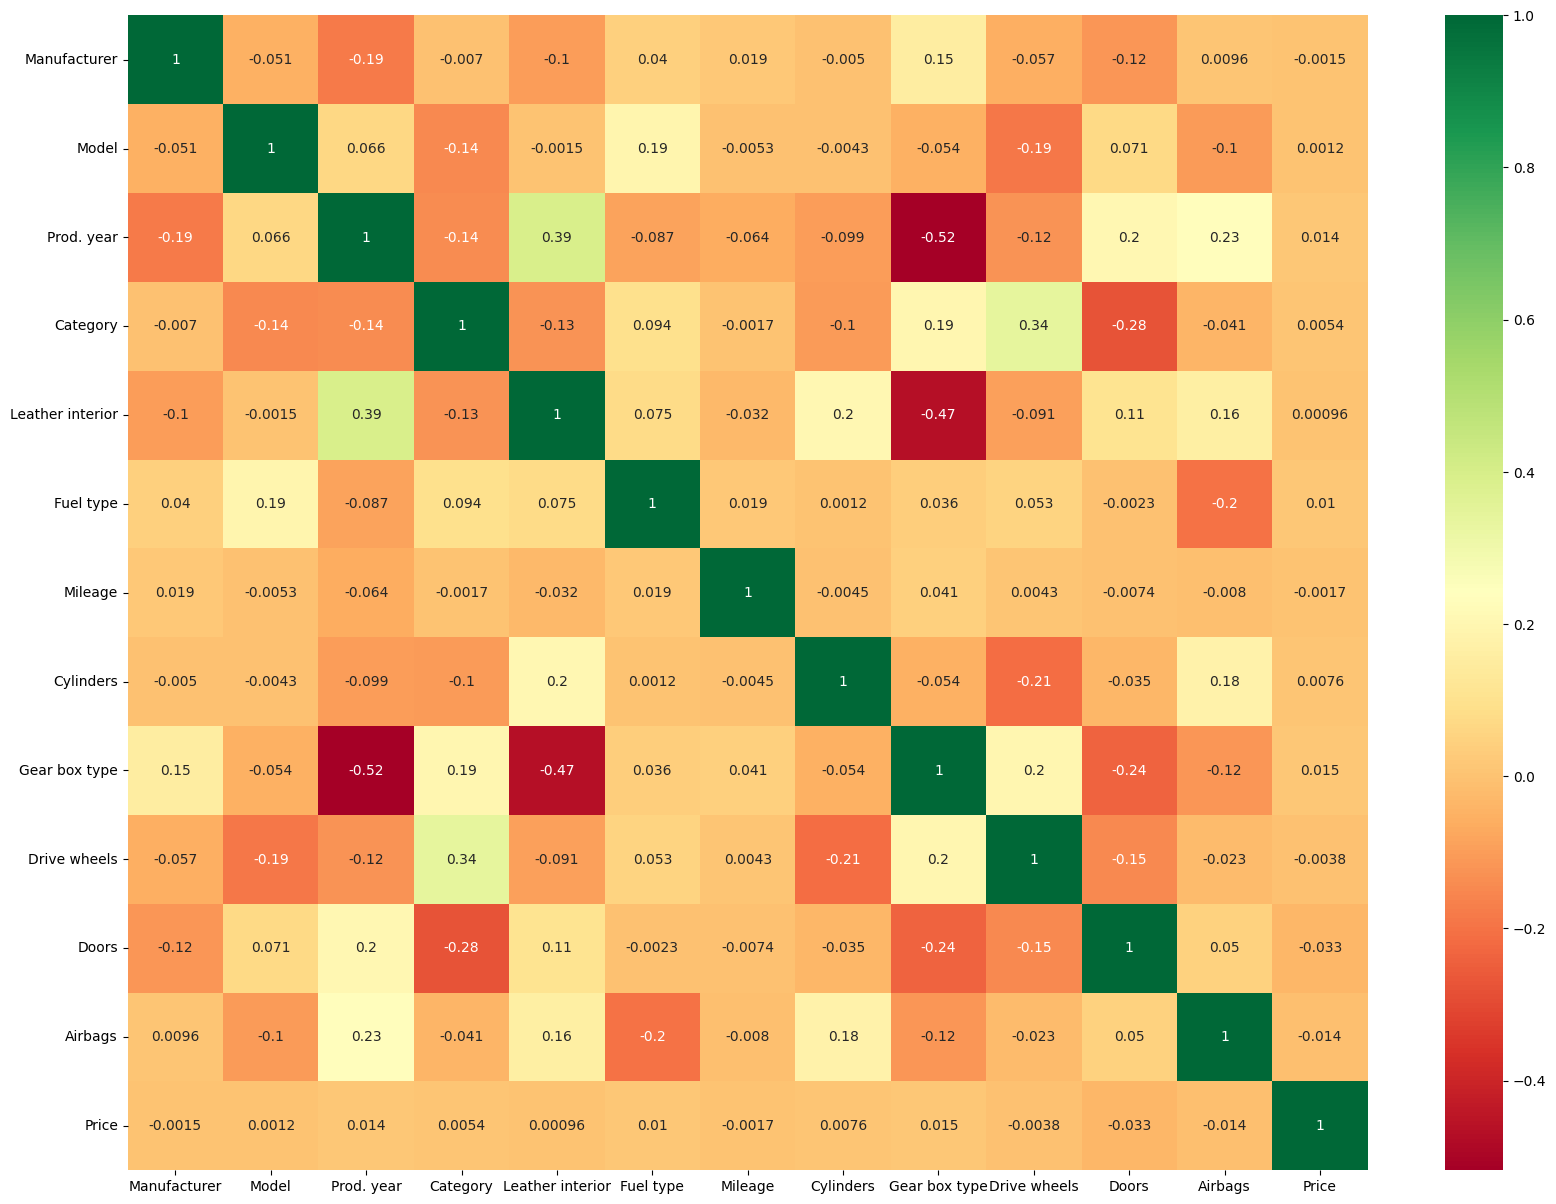

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

In [45]:
from keras.optimizers.optimizer_v2 import gradient_descent
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# Define the features and labels
X = data.drop("Price", axis=1)
y = data["Price"]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
y = scaler.fit_transform(y.values.reshape(-1, 1))


# scaler = MinMaxScaler(feature_range=(0, 1))
# y = scaler.fit_transform(y.values.reshape(-1, 1))




# Split the data into training and test sets
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=42)


# # Normalizing 
# tf.keras.layers.Normalization(
#     axis=-1, mean=None, variance=None, invert=False)


# Define the model
model = Sequential([
    # keras.layers.Reshape(target_shape=(29 * 28,), input_shape=(28, 28)),
    Dense(units=12, activation='relu'),
    Dense(units=60, activation='softmax'),
    Dense(units=120, activation='softmax'),
    Dense(units=120, activation='softmax'),
    Dense(units=60, activation='softmax'),
    Dense(units=1, activation='linear')
])

# Compile the model
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# model.compile(optimizer='adam',loss='mean_squared_error')




In [46]:
# y.mean()
X.mean()
# y.std()


1.3454137448806673e-15

In [47]:
num_features = X_train
print(num_features)

[[ 0.55071997  0.08050688  0.90705885 ...  0.16115917  0.18681799
   0.32245655]
 [-0.30066657  0.71383987  0.36753909 ...  0.16115917  0.18681799
   1.25439765]
 [-0.44256432 -0.06735296  0.36753909 ...  0.16115917  0.18681799
  -0.60948454]
 ...
 [-0.44256432  1.07856082  1.08689877 ...  0.16115917  0.18681799
  -0.60948454]
 [ 1.118311   -0.32857201  0.00785925 ... -1.58964986  0.18681799
  -0.143514  ]
 [-0.01687105 -1.43259217 -1.79053993 ...  0.16115917  0.18681799
   0.08947128]]


In [48]:
model.build((12958, 12))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (12958, 12)               156       
                                                                 
 dense_7 (Dense)             (12958, 60)               780       
                                                                 
 dense_8 (Dense)             (12958, 120)              7320      
                                                                 
 dense_9 (Dense)             (12958, 120)              14520     
                                                                 
 dense_10 (Dense)            (12958, 60)               7260      
                                                                 
 dense_11 (Dense)            (12958, 1)                61        
                                                                 
Total params: 30,097
Trainable params: 30,097
Non-trai

In [50]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10000
203/203 [==============================] - 1s 4ms/step - loss: 1.0029 - val_loss: 1.0149
Epoch 2/10000
203/203 [==============================] - 1s 4ms/step - loss: 1.0029 - val_loss: 1.0149
Epoch 3/10000
203/203 [==============================] - 1s 3ms/step - loss: 1.0029 - val_loss: 1.0150
Epoch 4/10000
203/203 [==============================] - 1s 3ms/step - loss: 1.0029 - val_loss: 1.0150
Epoch 5/10000
203/203 [==============================] - 1s 3ms/step - loss: 1.0029 - val_loss: 1.0150
Epoch 6/10000
203/203 [==============================] - 1s 3ms/step - loss: 1.0029 - val_loss: 1.0150
Epoch 7/10000
203/203 [==============================] - 1s 3ms/step - loss: 1.0029 - val_loss: 1.0150
Epoch 8/10000
203/203 [==============================] - 1s 3ms/step - loss: 1.0029 - val_loss: 1.0150
Epoch 9/10000
203/203 [==============================] - 1s 3ms/step - loss: 1.0029 - val_loss: 1.0150
Epoch 10/10000
203/203 [==============================] - 1s 3ms/step - l

KeyboardInterrupt: 